In [8]:
import tensorflow as tf
import cv2
tf.reset_default_graph()

from Model import Model, DecoderType
from SamplePreprocessor import preprocess
import sys
import argparse
import cv2
import editdistance
from DataLoader import DataLoader, Batch

decoderType = 'wordbeamsearch'



decoderType = DecoderType.BestPath
if 'beamsearch':
    decoderType = DecoderType.BeamSearch
if 'wordbeamsearch':
    decoderType = DecoderType.WordBeamSearch
        
        
class FilePaths:
	"filenames and paths to data"
	fnCharList = '../model/charList.txt'
	fnAccuracy = '../model/accuracy.txt'
	fnTrain = '../data/'
	fnInfer = '../data/test.png'
	fnCorpus = '../data/corpus.txt'

model = Model(open(FilePaths.fnCharList).read(), decoderType, mustRestore=True)

def infer(model, fnImg):
	"recognize text in image provided by file path"
	img = preprocess(cv2.imread(fnImg, cv2.IMREAD_GRAYSCALE), Model.imgSize)
	batch = Batch(None, [img])
	(recognized, probability) = model.inferBatch(batch, True)
	print('Recognized:', '"' + recognized[0] + '"')
	print('Probability:', probability[0])
    
    

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Tensorflow: 1.12.0
Init with stored values from ../model/snapshot-38
INFO:tensorflow:Restoring parameters from ../model/snapshot-38


In [2]:
ls 

analyze.py          main.py       SamplePreprocessor.py
CTCWordBeamSearch/  Model.py      testing.ipynb
DataLoader.py       __pycache__/  TFWordBeamSearch.so


In [11]:
%%bash

git clone https://github.com/githubharald/CTCWordBeamSearch.git
cd CTCWordBeamSearch/cpp/proj/

NUMTHREADS="4"
echo "Parallel decoding with $NUMTHREADS threads"
PARALLEL="-DWBS_PARALLEL -DWBS_THREADS=$NUMTHREADS"

# get and print TF version
TF_VERSION=$(python3 -c "import tensorflow as tf ;  print(tf.__version__)")
echo "Your TF version is $TF_VERSION"
TF_CFLAGS=( $(python3 -c 'import tensorflow as tf; print(" ".join(tf.sysconfig.get_compile_flags()))') )
TF_LFLAGS=( $(python3 -c 'import tensorflow as tf; print(" ".join(tf.sysconfig.get_link_flags()))') )


g++ -Wall -O2 --std=c++11 -shared -o TFWordBeamSearch.so ../src/TFWordBeamSearch.cpp ../src/main.cpp ../src/WordBeamSearch.cpp ../src/PrefixTree.cpp ../src/Metrics.cpp ../src/MatrixCSV.cpp ../src/LanguageModel.cpp ../src/DataLoader.cpp ../src/Beam.cpp -fPIC ${TF_CFLAGS[@]} ${TF_LFLAGS[@]} $PARALLEL


cp CTCWordBeamSearch/cpp/proj/TFWordBeamSearch.so .

# need to unzip model 

Parallel decoding with 4 threads
Your TF version is 1.12.0


Cloning into 'CTCWordBeamSearch'...


In [16]:
%%bash
cp CTCWordBeamSearch/cpp/proj/TFWordBeamSearch.so .

In [4]:
ls ../data/test.png

analyze.png   Get IAM training data.txt  translationInvariance.npy
checkDirs.py  pixelRelevance.npy         translationInvarianceTexts.pickle
corpus.txt    test.png                   words.txt


In [9]:
infer(model, '../data/test.png')

Recognized: "little"
Probability: 0.96625495


In [17]:
from glob import glob

for f in glob('../data/words/a03/a03-009/*'):

    infer(model, f)

Recognized: "an"
Probability: 0.98047525
Recognized: "difficult"
Probability: 0.59630936
Recognized: "and"
Probability: 0.9646121
Recognized: "also"
Probability: 0.33708933
Recognized: "it"
Probability: 0.7752454
Recognized: "idea"
Probability: 0.09965921
Recognized: "such"
Probability: 0.56423956
Recognized: "the"
Probability: 0.785784
Recognized: "hug0slav"
Probability: 1.1656747e-06
Recognized: "Pity"
Probability: 1.8623157e-05
Recognized: "Casablanca"
Probability: 0.031954046
Recognized: ","
Probability: 0.85637933
Recognized: "world"
Probability: 0.8171616
Recognized: "on"
Probability: 0.88122934
Recognized: "uncommitted"
Probability: 0.5107472
Recognized: "extended"
Probability: 0.72222257
Recognized: "some"
Probability: 0.9320382
Recognized: "inter-African"
Probability: 0.19575293
Recognized: "The"
Probability: 0.60978365
Recognized: "is"
Probability: 0.7850034
Recognized: "in"
Probability: 0.9936187
Recognized: "the"
Probability: 0.9169054
Recognized: "and"
Probability: 0.90383

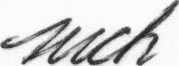

In [14]:
from PIL import Image

Image.open('../data/words/a03/a03-009/a03-009-06-04.png')

In [6]:
!pip install editdistance, opencv-python tensorflow torch torchtext

    100% |████████████████████████████████| 174kB 11.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
